In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

3D Transformation
1. Translation
2. Scaling
3. Rotation

Structure
|   Rxx Rxy Rxz Tx| -> Rotation & Translation (X)\
|   Ryx Ryy Ryz Ty| -> Rotation & Translation (Y)\
|   Rzx Rzy Rzz Tz| -> Rotation & Translation (Z)\
|   0   0   0   1 | -> Homogenous Coordinate

1. Translation Matrix: Moves an object in the 3D space.

|   1   0   0    Tx|\
|   0   1   0    Ty|\
|   0   0   1    Tz|\
|   0   0   0    1 |

where (tx, ty, tz) = translation distances along the X, Y, Z axes.

In [7]:
# Parameters
radius = 4
num_points = 200
translation = [20, 30, 50] # Translation vector (tx, ty, tz)

# Generate sphere points
phi = np.linspace(0, np.pi, num_points // 2) # Latitude
theta = np.linspace(0, 2*np.pi, num_points) # Longitude
phi, theta = np.meshgrid(phi, theta)


# Parametric equations for the sphere
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)



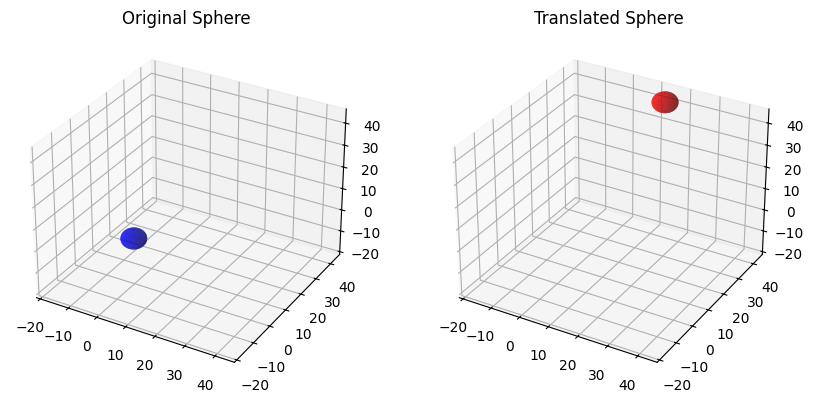

In [12]:
# Apply Translation
x_translated = x + translation[0]
y_translated = y + translation[1]
z_translated = z + translation[2]

# Plot original and translated spheres
fig = plt.figure(figsize=(10, 5))

# Original sphere
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, color='blue', alpha=0.7)
ax1.set_title('Original Sphere')
ax1.set_xlim([-20, 45])
ax1.set_ylim([-20, 45])
ax1.set_zlim([-20, 45])

# Translated sphere
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_translated, y_translated, z_translated, color='red', alpha=0.7)
ax2.set_title('Translated Sphere')
ax2.set_xlim([-20, 45])
ax2.set_ylim([-20, 45])
ax2.set_zlim([-20, 45])

plt.show()

2. Scaling Matrix: Changes object size.
| sx    0   0   0   |
| 0    sy   0   0   |
| 0    0   sz   0   |
| 0     0   0   0   |

(sx, sy, sz) = scaling factors along the axes

In [15]:
#DRAWING A CYLINDER
# Parameters for the cylinder
radius = 5  # Cylinder radius
height = 10  # Cylinder height
num_points = 200  # Number of points around the cylinder's circumference
scaling_factors = [1, 0.5, 0.25]  # Scaling factors (sx, sy, sz)

# Create a meshgrid for the cylinder's angle (theta) and height (z)
theta = np.linspace(0, 2*np.pi, num_points)  # Angle around the cylinder
z = np.linspace(0, height, num_points)      # Height of the cylinder
theta, Z = np.meshgrid(theta, z)

# Parametric equations for a cylinder
X = radius * np.cos(theta)
Y = radius * np.sin(theta)



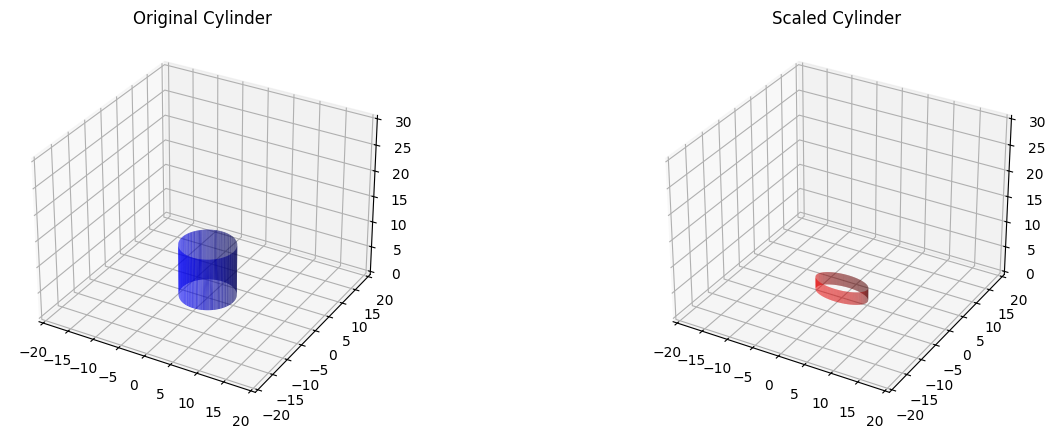

In [16]:
# Apply scaling
X_scaled = X * scaling_factors[0]
Y_scaled = Y * scaling_factors[1]
Z_scaled = Z * scaling_factors[2]

# Plot original and scaled cylinders
fig = plt.figure(figsize=(15, 5))

# Original cylinder
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, color='blue', alpha=0.7)
ax1.set_title('Original Cylinder')
ax1.set_xlim([-20, 20])
ax1.set_ylim([-20, 20])
ax1.set_zlim([0, 30])

# Scaled cylinder
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_scaled, Y_scaled, Z_scaled, color='red', alpha=0.7)
ax2.set_title('Scaled Cylinder')
ax2.set_xlim([-20, 20])
ax2.set_ylim([-20, 20])
ax2.set_zlim([0, 30])

plt.show()

3. Rotation Matrices: Rotates objects around axes.\
3.1 axis
|   1   0       0       0   |
|   0   cos(0)  -sin(0) 0   |
|   0   sin(0)  cos(0)  0   |
|   0   0       0       1   |

3.2 Y axis
|   cos(0)   0   sin(0) 0   |
|   0        1   0      0   |
|   0sin(0)  0   cos(0) 0   |
|   0        0   0      1   |

3.3 Z axis
|   cos(0)  -sin(0) 0   0   |
|   sin(0)  cos(0)  0   0   |
|   0       0       1   0   |
|   0       0       0   1   |

In [19]:
#DRAWING A CONE
# Parameters for the cone
radius = 3  # Cone radius at the base
height = 6  # Height of the cone
num_points = 200  # Number of points around the cone
rotation_angle = np.pi/4  # Rotation angle in radians (45 degrees)

# Create a meshgrid for the cone's angle (theta) and height (z)
theta = np.linspace(0, 2*np.pi, num_points)
z = np.linspace(0, height, num_points)
theta, z = np.meshgrid(theta, z)

r = (height - z) / height * radius # Cone radius as a function of z
x = r * np.cos(theta)
y = r * np.sin(theta)

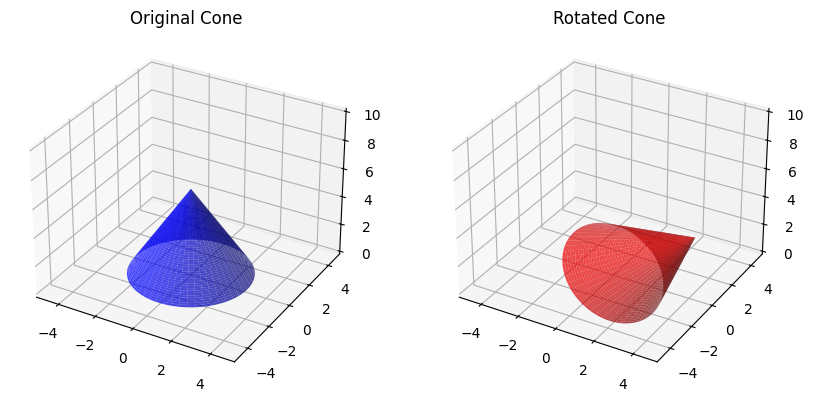

In [20]:
# apply rotation around the y-axis
rotation_matrix = np.array([
    [np.cos(rotation_angle), 0, np.sin(rotation_angle)],
    [0, 1, 0],
    [-np.sin(rotation_angle), 0, np.cos(rotation_angle)]
])

# Flatten the points, apply the rotation, and reshape
points = np.array([x.flatten(), y.flatten(), Z.flatten()])
rotated_points = np.dot(rotation_matrix, points)

x_rotated = rotated_points[0].reshape(x.shape)
y_rotated = rotated_points[1].reshape(y.shape)
z_rotated = rotated_points[2].reshape(z.shape)

# Plot original and rotated cones
fig = plt.figure(figsize=(10, 5))

# Original cone
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, Z, color='blue', alpha=0.7)
ax1.set_title('Original Cone')
ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_zlim([0, 10])

# Rotated cone
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_rotated, y_rotated, z_rotated, color='red', alpha=0.7)
ax2.set_title('Rotated Cone')
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.set_zlim([0, 10])

plt.show()


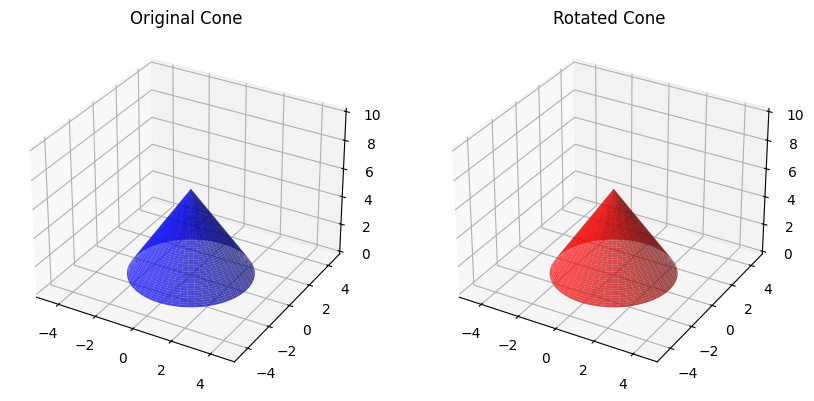

In [21]:
# Rotation matrix for rotation around Z-axis
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle), 0],
    [np.sin(rotation_angle), np.cos(rotation_angle), 0],
    [0, 0, 1]
])

# Flatten the points, apply the rotation, and reshape
points = np.array([x.flatten(), y.flatten(), z.flatten()])
rotated_points = np.dot(rotation_matrix, points)

x_rotated = rotated_points[0].reshape(x.shape)
y_rotated = rotated_points[1].reshape(y.shape)
z_rotated = rotated_points[2].reshape(z.shape)

# Plot original and rotated cones
fig = plt.figure(figsize=(10, 5))

# Original cone
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, color='blue', alpha=0.7)
ax1.set_title('Original Cone')
ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_zlim([0, 10])

# Rotated cone
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_rotated, y_rotated, z_rotated, color='red', alpha=0.7)
ax2.set_title('Rotated Cone')
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.set_zlim([0, 10])

plt.show()


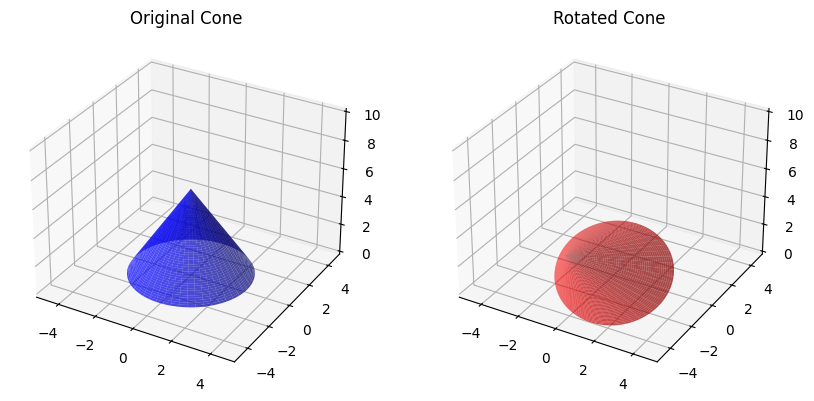

In [22]:
# rotation matrix for rotation around X-axis
rotation_matrix = np.array([
    [1, 0, 0],
    [0, np.cos(rotation_angle), -np.sin(rotation_angle)],
    [0, np.sin(rotation_angle), np.cos(rotation_angle)]
])

# Flatten the points, apply the rotation, and reshape
points = np.array([x.flatten(), y.flatten(), z.flatten()])
rotated_points = np.dot(rotation_matrix, points)

x_rotated = rotated_points[0].reshape(x.shape)
y_rotated = rotated_points[1].reshape(y.shape)
z_rotated = rotated_points[2].reshape(z.shape)

# Plot original and rotated cones
fig = plt.figure(figsize=(10, 5))

# Original cone
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, color='blue', alpha=0.7)
ax1.set_title('Original Cone')
ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_zlim([0, 10])

# Rotated cone
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_rotated, y_rotated, z_rotated, color='red', alpha=0.7)
ax2.set_title('Rotated Cone')
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.set_zlim([0, 10])

plt.show()

----

Activity for Monday
1. Translate the prism in the last activity using the parameter [5, 7, 2] <- use prism in question no. 3 (previous MP)

2. Scale the cube in the last activity using the parameter [0, 2, 1]

3. Rotate the pyramid in the last activity using 120 degrees about x, y and z axis.
